In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [193]:
df_autos = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/modelos_primer_parcial/ml_cars/ML_Cars_dataset.csv")
df_autos

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


___

# 1) ¿Cuales son las características principales del DF?

a. Cantidad de rows y columnas.

b. Clases de datos

In [194]:
# A) Cantidad de rows y columnas

df_autos.shape

print("Este dataset tiene " + str(df_autos.shape[0]) + " filas y " + str(df_autos.shape[1]) + " columnas")

Este dataset tiene 205 filas y 9 columnas


In [195]:
# B) Clases de datos

df_autos.dtypes

aspiration         object
enginelocation     object
carwidth           object
curbweight          int64
enginetype         object
cylindernumber     object
stroke            float64
peakrpm             int64
price              object
dtype: object

___

# 2) El dataset cuenta con datos faltantes?

a. Muestre la cantidad de faltantes por columnas

b. Que porcentaje de faltantes hay

c. Muestre las filas con datos faltantes

d. Sí hay faltantes, ¿Cómo procederán a hacer el tratamiento de los mismos?

e. Haga el tratamiento de los valores faltantes en caso de creerlo necesario

In [196]:
# A) Muestre la cantidad de faltantes por columnas

df_autos.isnull().sum()

aspiration         0
enginelocation    10
carwidth           2
curbweight         0
enginetype         0
cylindernumber     0
stroke             0
peakrpm            0
price              0
dtype: int64

In [197]:
# B) Que porcentaje de faltantes hay

(df_autos.isnull().sum()/len(df_autos)).round(6)

aspiration        0.000000
enginelocation    0.048780
carwidth          0.009756
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

In [198]:
# C) Muestre las filas con datos faltantes

df_autos[df_autos.isna().any(axis=1)]

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
7,std,front,NaN,2954,ohc,five,3.40,5500,expensive
14,std,NaN,66.9,3055,ohc,six,3.19,4250,expensive
18,std,NaN,60.3,1488,l,three,3.03,5100,cheap
54,std,NaN,64.2,1950,ohc,four,3.15,5000,cheap
68,turbo,NaN,70.3,3750,ohc,five,3.64,4350,expensive
106,std,NaN,67.9,3139,ohcv,six,3.27,5200,expensive
113,std,NaN,68.4,3285,l,four,2.19,5000,expensive
139,std,NaN,63.6,2120,ohcf,four,2.64,4400,cheap
165,std,NaN,64,2265,dohc,four,3.08,6600,cheap


In [199]:
# D) Sí hay faltantes, ¿Cómo procederán a hacer el tratamiento de los mismos?

# Voy a eliminar las filas que tienen datos faltantes porque son pocas y siento que no van a afectar al análisis. A parte, no me puedo ivnentar los datos faltantes porque no tengo información de los mismos.



In [200]:
# E) Haga el tratamiento de los valores faltantes en caso de creerlo necesario

df_autos.dropna(inplace=True)
df_autos

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


___

# 3) Imprima las estadísticas básicas del dataset.

In [201]:
df_autos.describe()

,curbweight,stroke,peakrpm
count,193.000000,193.000000,193.000000
mean,2550.974093,3.263316,5124.870466
std,513.076905,0.308028,467.348582
min,1713.000000,2.070000,4150.000000
25%,2145.000000,3.110000,4800.000000
50%,2414.000000,3.290000,5200.000000
75%,2912.000000,3.410000,5500.000000
max,4066.000000,4.170000,6600.000000


<Axes: xlabel='stroke'>

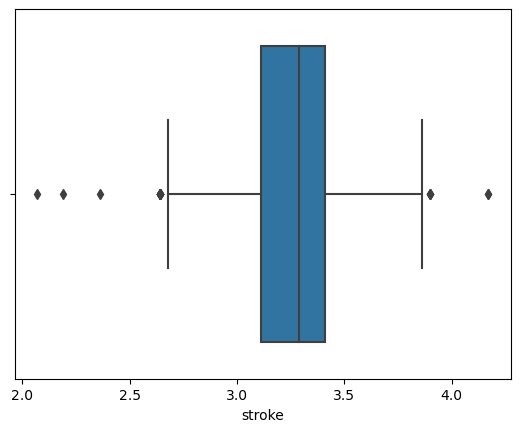

In [202]:
sns.boxplot(x=df_autos['stroke'])

<Axes: xlabel='peakrpm'>

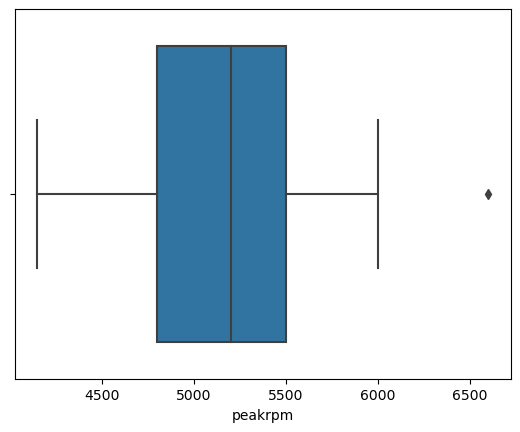

In [203]:
sns.boxplot(x=df_autos['peakrpm'])

<Axes: xlabel='curbweight'>

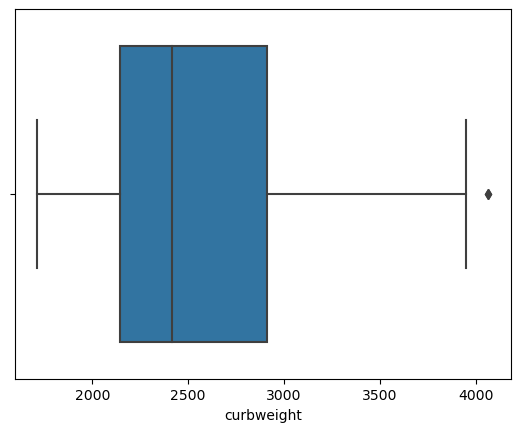

In [204]:
sns.boxplot(x=df_autos['curbweight'])

___

# 4) ¿Qué es un dato outlier? ¿Cómo procedería al análisis del mismo?

#### Un dato outlier, también conocido como anómalo, es un dato que está fuera de la distribución de una variable. Muchas veces los valores outliers pueden ser datos mal imputados pero otras veces pueden aportar información importante sobre el caso. 
#### Por ejemplo en un caso de Fraude, los casos outliers pueden significar un patrón a analizar. En este dataset no tenemos ningún outlier ya que si se realiza un boxplot, todos los valores se verían mas o menos igual. En 'peakrpm' se puede ver que hay un valor que se aleja un poco de la distribución pero no lo considero un outlier.

___

# 5) Cambie el nombre de las columnas a "numero_cilindros", "max_rpm", "peso_al_vacio"

In [205]:
df_autos

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


In [206]:
df_autos.columns

Index(['aspiration', 'enginelocation', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'stroke', 'peakrpm', 'price'],
      dtype='object')

In [207]:
df_autos.rename(columns = {"cylindernumber" : "numero_cilindros", "peakrpm" : "max_rpm", "curbweight" : "peso_al_vacio"}, inplace=True)
df_autos

,aspiration,enginelocation,carwidth,peso_al_vacio,enginetype,numero_cilindros,stroke,max_rpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


___

# 6) ¿Cuantos tipos de cilindros únicos hay en el dataset?

In [208]:
df_autos["enginetype"].nunique()

7

In [209]:
df_autos["numero_cilindros"].value_counts()

numero_cilindros
four      152
six        22
five        9
eight       5
two         4
twelve      1
Name: count, dtype: int64

___

# 7) Cree una nueva columna que llamada "tolerancia_motor" que consista en agarrar la columna “max_rpm” y decir si el motor es de alta, media o baja tolerancia. Si el valor de la columna esta entre 4000 y 4500, es de baja tolerancia, entre 4500 y 5750 es de media y mayor a 5750 es de alta.
Hints!
a. .apply(lambda x:x.split(" ")[0])

In [210]:
df_autos["max_rpm"].value_counts().sort_index()

max_rpm
4150     5
4200     5
4250     2
4350     3
4400     2
4500     7
4650     1
4750     4
4800    36
4900     1
5000    25
5100     4
5200    22
5250     6
5300     1
5400    12
5500    35
5600     1
5750     1
5800     7
5900     3
6000     9
6600     1
Name: count, dtype: int64

In [211]:
def tolerancia_del_motor(x):
    if 4000 < x <= 4500:
        return "baja"
    if 4500 < x <= 5750:
        return "media"
    if x > 5750:
        return "alta"

df_autos["tolerancia_motor"] = df_autos["max_rpm"].apply(tolerancia_del_motor)

In [212]:
df_autos

,aspiration,enginelocation,carwidth,peso_al_vacio,enginetype,numero_cilindros,stroke,max_rpm,price,tolerancia_motor
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive,media
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive,media
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive,media
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive,media
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive,media
...,...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive,media
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive,media
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive,media
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive,media


___

# 8) Tipos de Autos. Responda.

a. Clasificarlos por clase socioeconomica

b. Clasificarlos por sus rpm

c. monto total de los autos con 6 cilindros

d. monto total de los autos con 8 cilindros

e. monto total de los autos con 10 cilindros

f. monto total de los autos con 12 cilindros



In [213]:
clasificacion = df_autos.groupby("numero_cilindros").agg(promedio_rpm = ("max_rpm" , "mean"))
clasificacion.reset_index()

,numero_cilindros,promedio_rpm
0,eight,4850.000000
1,five,5116.666667
2,four,5103.947368
3,six,5181.818182
4,twelve,5000.000000
5,two,6000.000000


In [214]:
clasificacion.sort_index()

,promedio_rpm
numero_cilindros,
eight,4850.000000
five,5116.666667
four,5103.947368
six,5181.818182
twelve,5000.000000
two,6000.000000


___

# 9) Armar autos con motor trasero

In [215]:
df_autos.enginetype.value_counts()

enginetype
ohc      141
ohcf      14
ohcv      12
dohc      11
l         10
rotor      4
dohcv      1
Name: count, dtype: int64

In [216]:
autos_motor_trasero = df_autos[(df_autos["enginelocation"] == "rear")]
autos_motor_trasero

,aspiration,enginelocation,carwidth,peso_al_vacio,enginetype,numero_cilindros,stroke,max_rpm,price,tolerancia_motor
126,std,rear,65,2756,ohcf,six,2.9,5900,expensive,alta
127,std,rear,65,2756,ohcf,six,2.9,5900,expensive,alta
128,std,rear,65,2800,ohcf,six,2.9,5900,expensive,alta


___

# 10) ¿Cuantos autos hay con un peso al vacio mayores a 4.000 en el dataset general?

In [217]:
autos_pesados = df_autos[df_autos["peso_al_vacio"] > 4000]
autos_pesados

,aspiration,enginelocation,carwidth,peso_al_vacio,enginetype,numero_cilindros,stroke,max_rpm,price,tolerancia_motor
47,std,front,69.6,4066,dohc,six,4.17,4750,expensive,media
48,std,front,*,4066,dohc,six,4.17,4750,expensive,media


### → Es probable que estos 2 samples sean camionetas ya que son los únicos que tienen un peso al vacio mayor a 4000 lbs. 

In [218]:
def agregando_lbs(x):
    return str(x) + " lbs"

df_autos["peso_al_vacio"] = df_autos["peso_al_vacio"].apply(agregando_lbs)


In [219]:
df_autos

,aspiration,enginelocation,carwidth,peso_al_vacio,enginetype,numero_cilindros,stroke,max_rpm,price,tolerancia_motor
0,std,front,64.1,2548 lbs,dohc,four,2.68,5000,expensive,media
1,std,front,64.1,2548 lbs,dohc,four,2.68,5000,expensive,media
2,std,front,65.5,2823 lbs,ohcv,six,3.47,5000,expensive,media
4,std,front,66.4,2824 lbs,ohc,five,3.40,5500,expensive,media
5,std,front,66.3,2507 lbs,ohc,five,3.40,5500,expensive,media
...,...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952 lbs,ohc,four,3.15,5400,expensive,media
201,turbo,front,68.8,3049 lbs,ohc,four,3.15,5300,expensive,media
202,std,front,68.9,3012 lbs,ohcv,six,2.87,5500,expensive,media
203,turbo,front,68.9,3217 lbs,ohc,six,3.40,4800,expensive,media


___

# 11) Hacer un histograma para ver la distribución de los maximos rpm

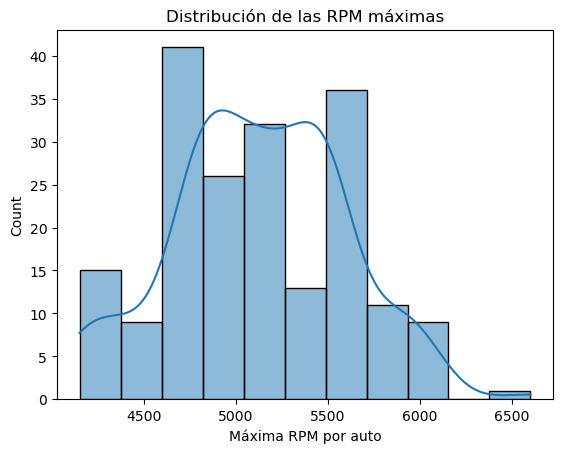

In [220]:
sns.histplot(df_autos["max_rpm"], bins='auto', kde = True)
plt.title("Distribución de las RPM máximas")
plt.xlabel("Máxima RPM por auto")
plt.show()

___

# 12) Agregar la columna peso_al_vacio_en_kilos

In [221]:
def convertir_libras_a_kilos(peso_libras):
    try:
        peso_libras = float(peso_libras.replace('lbs', '').strip())
        peso_kilos = peso_libras * 0.453592
        return f'{peso_kilos:.2f} kg'
    except ValueError:
        return peso_libras

df_autos['peso_al_vacio_en_kilos'] = df_autos['peso_al_vacio'].apply(convertir_libras_a_kilos)


In [222]:
df_autos

,aspiration,enginelocation,carwidth,peso_al_vacio,enginetype,numero_cilindros,stroke,max_rpm,price,tolerancia_motor,peso_al_vacio_en_kilos
0,std,front,64.1,2548 lbs,dohc,four,2.68,5000,expensive,media,1155.75 kg
1,std,front,64.1,2548 lbs,dohc,four,2.68,5000,expensive,media,1155.75 kg
2,std,front,65.5,2823 lbs,ohcv,six,3.47,5000,expensive,media,1280.49 kg
4,std,front,66.4,2824 lbs,ohc,five,3.40,5500,expensive,media,1280.94 kg
5,std,front,66.3,2507 lbs,ohc,five,3.40,5500,expensive,media,1137.16 kg
...,...,...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952 lbs,ohc,four,3.15,5400,expensive,media,1339.00 kg
201,turbo,front,68.8,3049 lbs,ohc,four,3.15,5300,expensive,media,1383.00 kg
202,std,front,68.9,3012 lbs,ohcv,six,2.87,5500,expensive,media,1366.22 kg
203,turbo,front,68.9,3217 lbs,ohc,six,3.40,4800,expensive,media,1459.21 kg


___

# 13) Hacer un gráfico de barras para comparar la cantidad de autos por tipo de cilindro.

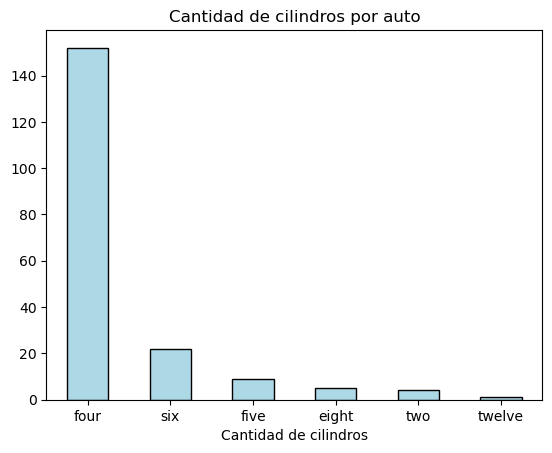

In [223]:
df_autos["numero_cilindros"].value_counts().plot(kind="bar", edgecolor="black", color="lightblue")
plt.title("Cantidad de cilindros por auto")
plt.xlabel("Cantidad de cilindros")
plt.xticks(rotation=0)
plt.show()

___

# 14) Hacer un histograma para ver la distribución del ancho de los autos según su tolerancia de motor.

In [224]:
df_autos["carwidth"] = df_autos["carwidth"].str.replace("*", "NaN").astype(float)
df_autos


,aspiration,enginelocation,carwidth,peso_al_vacio,enginetype,numero_cilindros,stroke,max_rpm,price,tolerancia_motor,peso_al_vacio_en_kilos
0,std,front,64.1,2548 lbs,dohc,four,2.68,5000,expensive,media,1155.75 kg
1,std,front,64.1,2548 lbs,dohc,four,2.68,5000,expensive,media,1155.75 kg
2,std,front,65.5,2823 lbs,ohcv,six,3.47,5000,expensive,media,1280.49 kg
4,std,front,66.4,2824 lbs,ohc,five,3.40,5500,expensive,media,1280.94 kg
5,std,front,66.3,2507 lbs,ohc,five,3.40,5500,expensive,media,1137.16 kg
...,...,...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952 lbs,ohc,four,3.15,5400,expensive,media,1339.00 kg
201,turbo,front,68.8,3049 lbs,ohc,four,3.15,5300,expensive,media,1383.00 kg
202,std,front,68.9,3012 lbs,ohcv,six,2.87,5500,expensive,media,1366.22 kg
203,turbo,front,68.9,3217 lbs,ohc,six,3.40,4800,expensive,media,1459.21 kg


In [225]:
df_autos_promedio_ancho_tolerancia = df_autos.groupby("tolerancia_motor").agg(promedio_ancho = ("carwidth", "mean"),
mediana_ancho = ("carwidth", "median")).reset_index().sort_values(by="promedio_ancho", ascending=False)
df_autos_promedio_ancho_tolerancia

,tolerancia_motor,promedio_ancho,mediana_ancho
1,baja,67.413043,66.5
2,media,65.788435,65.5
0,alta,64.842105,65.0


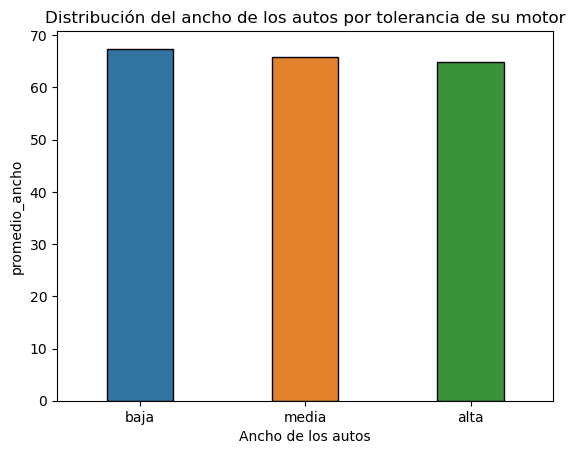

In [226]:
sns.barplot(x=df_autos_promedio_ancho_tolerancia["tolerancia_motor"], y= df_autos_promedio_ancho_tolerancia["promedio_ancho"], edgecolor="black", width=0.4)
plt.title("Distribución del ancho de los autos por tolerancia de su motor")
plt.xlabel("Ancho de los autos")
plt.show()

In [227]:
df_autos.describe()

,carwidth,stroke,max_rpm
count,189.000000,193.000000,193.000000
mean,65.891005,3.263316,5124.870466
std,2.065747,0.308028,467.348582
min,61.800000,2.070000,4150.000000
25%,64.100000,3.110000,4800.000000
50%,65.500000,3.290000,5200.000000
75%,66.500000,3.410000,5500.000000
max,72.300000,4.170000,6600.000000


___

# 15) Hacer un histograma para ver la distribución del ancho de los autos según su stroke.

In [228]:
df_autos_promedio_ancho_stroke = df_autos.groupby("stroke").agg(promedio_ancho = ("carwidth", "mean"),
mediana_ancho = ("carwidth", "median")).reset_index().sort_values(by="promedio_ancho", ascending=False)
df_autos_promedio_ancho_stroke.sort_values(by="stroke", ascending=False)

,stroke,promedio_ancho,mediana_ancho
36,4.170,69.600000,69.60
35,3.900,66.466667,66.50
34,3.860,66.300000,66.30
33,3.640,70.766667,70.30
32,3.580,65.360000,65.20
31,3.540,66.500000,66.50
30,3.520,68.400000,68.40
29,3.500,65.600000,65.60
28,3.470,64.925000,65.20
27,3.460,65.200000,65.40


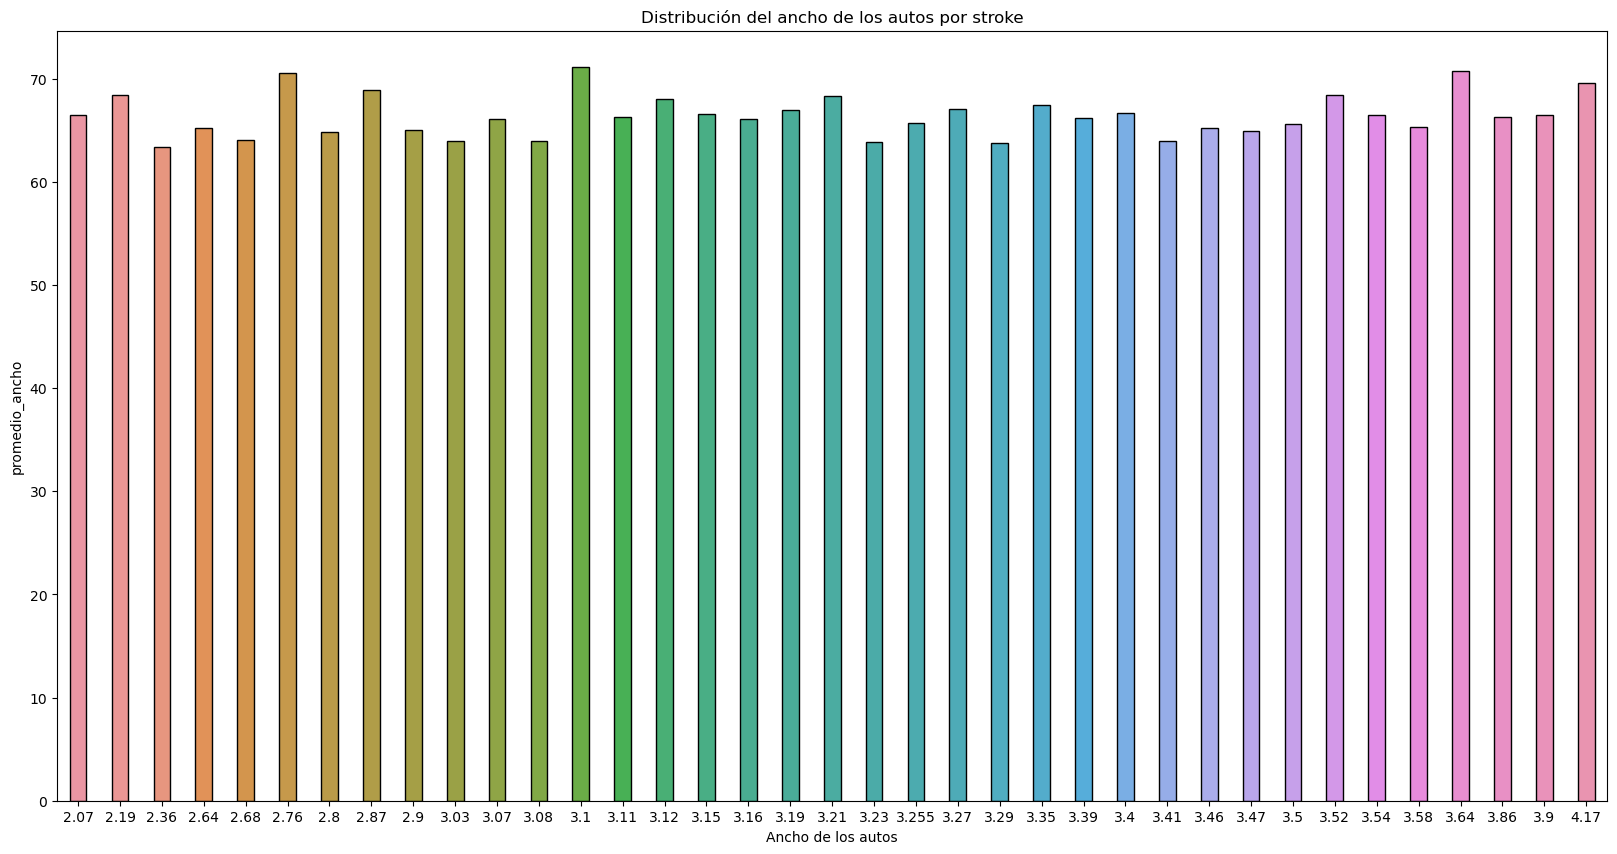

In [229]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_autos_promedio_ancho_stroke["stroke"], y= df_autos_promedio_ancho_stroke["promedio_ancho"], edgecolor="black", width=0.4)
plt.title("Distribución del ancho de los autos por stroke")
plt.xlabel("Ancho de los autos")
plt.show()

In [230]:
df_autos.describe()

,carwidth,stroke,max_rpm
count,189.000000,193.000000,193.000000
mean,65.891005,3.263316,5124.870466
std,2.065747,0.308028,467.348582
min,61.800000,2.070000,4150.000000
25%,64.100000,3.110000,4800.000000
50%,65.500000,3.290000,5200.000000
75%,66.500000,3.410000,5500.000000
max,72.300000,4.170000,6600.000000


___

# _TEORÍA_

# 1) Teniendo en cuenta este dataset ¿Qué problema podrías resolver con Machine Learning?

#### Un problema que se podría resolver con Machine Learning con este dataframe, es predecir el precio de un auto en base a sus características. Por ejemplo, si tenemos un auto con 8 cilindros, una tolerancia alta de motor, un peso al vacio de 3.500 lbs y una aspiración turbo, podemos predecir que el precio de ese auto va a ser alto.
#### Otro problema que se podría llegar a resolver con Machine Learning (haciendo referencia al punto anterior) es predecir el modelo del auto. Por ejemplo, si tenemos un auto con 8 cilindros, una tolerancia alta de motor, un peso al vacio de 3.500 lbs y una aspiración turbo, podemos predecir que la marca de ese auto será Porsche y el modelo Panamera.

# 2) En caso de embarcarse en una tarea de Machine Learning. Describa el proceso CRISPDM y expliquelo para este caso.

# 3) ¿Qué decisión del negocio o tarea se podría automatizar o escalar? ¿Por qué?

#### Con el modelo que se desarrolle se podría optimizar el inventario. Se podría predecir la demanda de ciertos tipos de automóviles en función de las condiciones macroecononómicas y las tendencias históricas. Esto podría ayudar a la empresa a mantener un inventario adecuado y evitar excedentes o escasez.
#### Además, otra cosa que se podría llegar a hacer es la optimización de precios dinámicos. Si se usan datos históricos de precios de autos y características como el tipo de motor, la ubicación, el número de cilindros y otros factores, se podría implementar un sistema de precios dinámicos que ajuste automáticamente los precios de los automóviles en función de la demanda y la oferta del mercado.